**Esercizio**

*Importare le librerie*

In [27]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

*URL del dataset*

In [28]:
url = 'https://dati.beniculturali.it/dataset/dataset-eventiMeseCorrente.json'

*Effettuare la richiesta API*

In [29]:
response = requests.get(url)

*Verificare esito richiesta*

In [30]:
if response.status_code == 200:
    try:
        data = response.json()
    except json.JSONDecodeError:
        print("Errore nel parsing del JSON.")
        data = {}
else:
    print("Errore nel download del JSON")
    data = {}
if "@graph" in data:
    data = data["@graph"]
else:
    print("Errore: chiave '@graph' non trovata nel JSON.")
    data = []
if not data:
    raise ValueError("Il dataset è vuoto o non ha la struttura prevista.")

In [31]:
def get_label(item):
    label = item.get("rdfs:label", "Sconosciuto")  # Prende il valore o "Sconosciuto" se manca
    if isinstance(label, list) and len(label) > 0:  # Se è una lista, verifica il primo elemento
        first_elem = label[0]
        return first_elem["@value"] if isinstance(first_elem, dict) else first_elem
    elif isinstance(label, dict):  # Se è un dizionario, prende il valore di "@value"
        return label.get("@value", "Sconosciuto")
    elif isinstance(label, str):  # Se è già una stringa, la restituisce direttamente
        return label
    else:
        return "Sconosciuto"

*Convertire i dati in DataFrame*

In [32]:
df = pd.DataFrame([{
    "nome": get_label(item),
    "indirizzo": item.get("clvapit:fullAddress", "Sconosciuto"),
    "regione": item.get("clvapit:hasRegion", {}).get("@id", "").split("/")[-1] or "Sconosciuto",
    "provincia": item.get("clvapit:hasProvince", {}).get("@id", "").split("/")[-1] or "Sconosciuto",
    "città": item.get("clvapit:hasCity", {}).get("@id", "").split("/")[-1] or "Sconosciuto"
} for item in data])

*Visualizzare le prime righe*

In [33]:
print(df.head())

                                                nome  \
0        Indirizzo della Sede di: Anfiteatro campano   
1  Indirizzo della Sede di: Archivio Centrale del...   
2  Indirizzo della Sede di: Archivio Centrale del...   
3  Indirizzo della Sede di: Archivio Centrale del...   
4  Indirizzo della Sede di: Archivio di Stato di ...   

                                   indirizzo   regione  provincia  \
0  piazza Adriano - Santa Maria Capua Vetere  Campania    Caserta   
1          Piazzale degli Archivi, 27 - Roma     Lazio       Roma   
2          Piazzale degli Archivi, 27 - Roma     Lazio       Roma   
3          Piazzale degli Archivi, 27 - Roma     Lazio       Roma   
4               Via Mazzini, 185 - Agrigento   Sicilia  Agrigento   

                      città  
0  Santa_Maria_Capua_Vetere  
1                      Roma  
2                      Roma  
3                      Roma  
4                 Agrigento  


ANALISI 1: DISTRIBUZIONE DELLE STRUTTURE PER REGIONE

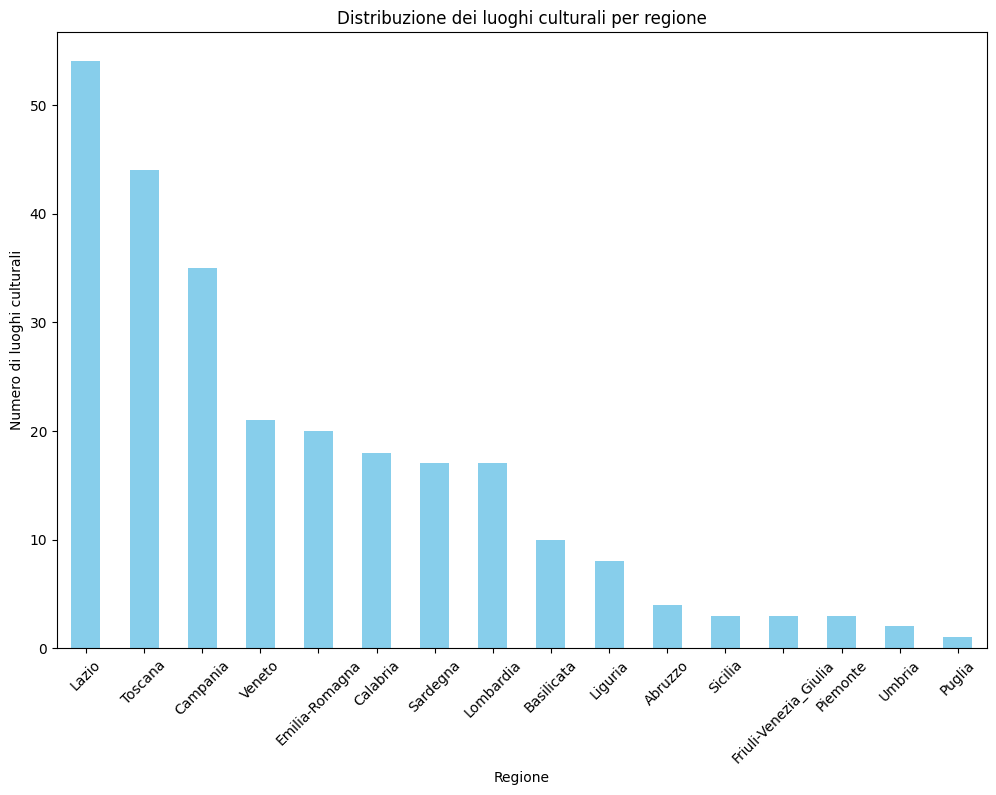

In [34]:
df_filtered = df[df['regione'] != 'Sconosciuto']
region_counts = df_filtered['regione'].value_counts()
plt.figure(figsize=(12, 8))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuzione dei luoghi culturali per regione')
plt.xlabel('Regione')
plt.ylabel('Numero di luoghi culturali')
plt.xticks(rotation=45)
plt.show()

### 📊 Grafico a barre: Distribuzione dei luoghi culturali per regione

Il grafico a barre mostra la distribuzione dei luoghi culturali per regione d'Italia. Ogni barra rappresenta il numero di luoghi culturali presenti in ciascuna regione. Alcune regioni emergono con un numero significativamente maggiore di luoghi culturali rispetto ad altre (Lazio, Toscana, Campania). Questo può indicare una maggiore concentrazione di risorse culturali e infrastrutture nelle aree con più barre alte. La differenza nel numero di luoghi culturali tra le diverse regioni suggerisce una distribuzione geografica disomogenea. Alcune regioni, specialmente quelle con una maggiore densità di popolazione o una tradizione storica e culturale consolidata, possono vantare un numero più alto di strutture culturali.

ANALISI 2: TOP 10 PROVINCE CON PIÙ STRUTTURE

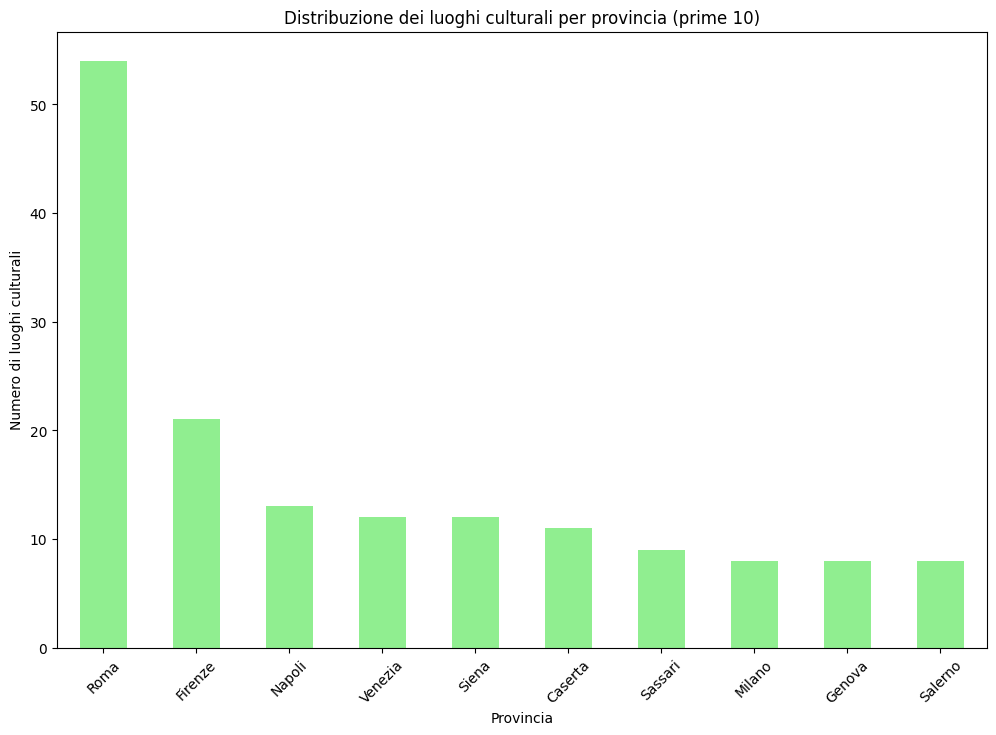

In [35]:
df_filtered = df[df['provincia'] != 'Sconosciuto']
province_counts = df_filtered['provincia'].value_counts().head(10)
plt.figure(figsize=(12, 8))
province_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribuzione dei luoghi culturali per provincia (prime 10)')
plt.xlabel('Provincia')
plt.ylabel('Numero di luoghi culturali')
plt.xticks(rotation=45)
plt.show()

 ### 📊 Grafico a barre: Distribuzione dei luoghi culturali per provincia

Il grafico a barre mostra la distribuzione dei luoghi culturali per provincia in Italia, escludendo i casi in cui la provincia è "Sconosciuto". Sono state selezionate le prime 10 province con il maggior numero di luoghi culturali. Le prime 10 province, evidenziate nel grafico, mostrano una forte concentrazione di luoghi culturali, indicando che alcune aree hanno una presenza culturale significativamente maggiore rispetto ad altre. Le province con le barre più alte sono quelle con il numero maggiore di strutture culturali (Roma e Firenze). La distribuzione dei luoghi culturali tra le province mostra una forte disparità, con alcune province che emergono nettamente per numero di luoghi, mentre altre sono meno rappresentate. Questo potrebbe essere il riflesso di differenze economiche, storiche e sociali tra le diverse aree del paese. L'analisi potrebbe suggerire che investimenti in cultura nelle province meno rappresentate potrebbero contribuire a bilanciare la distribuzione culturale a livello nazionale e ad aumentare l'accesso alla cultura per un pubblico più ampio, anche nelle aree meno centrali.

ANALISI 3: DISTRIBUZIONE DELLE STRUTTURE PER CITTÀ

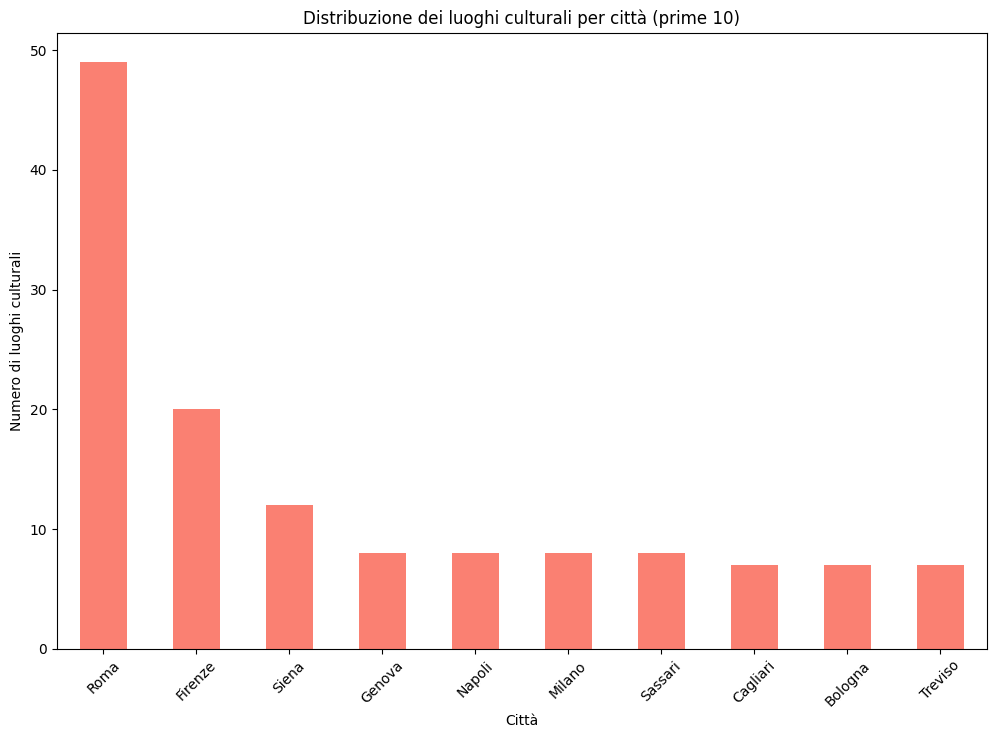

In [36]:
df_filtered = df[df['città'] != 'Sconosciuto']
city_counts = df_filtered['città'].value_counts().head(10)
plt.figure(figsize=(12, 8))
city_counts.plot(kind='bar', color='salmon')
plt.title('Distribuzione dei luoghi culturali per città (prime 10)')
plt.xlabel('Città')
plt.ylabel('Numero di luoghi culturali')
plt.xticks(rotation=45)
plt.show()

### 📊 Grafico a barre: Distribuzione dei luoghi culturali per città

Le città con il numero maggiore di luoghi culturali sono facilmente identificabili grazie alle barre più alte (Roma e Firenzse, Siena e Genova a seguire). Queste città rappresentano i principali centri culturali del paese, con una forte presenza di strutture dedicate alla cultura, come musei, teatri e gallerie. L'analisi suggerisce che, sebbene le principali città siano ben servite da strutture culturali, ci potrebbe essere un'opportunità di crescita per le città più piccole o meno centrali, che potrebbero beneficiare di investimenti mirati nel settore culturale per migliorare la loro offerta e attrarre più visitatori.

ANALISI 4: CONCENTRAZIONE DEI LUOGHI CULTURALI PER REGIONE

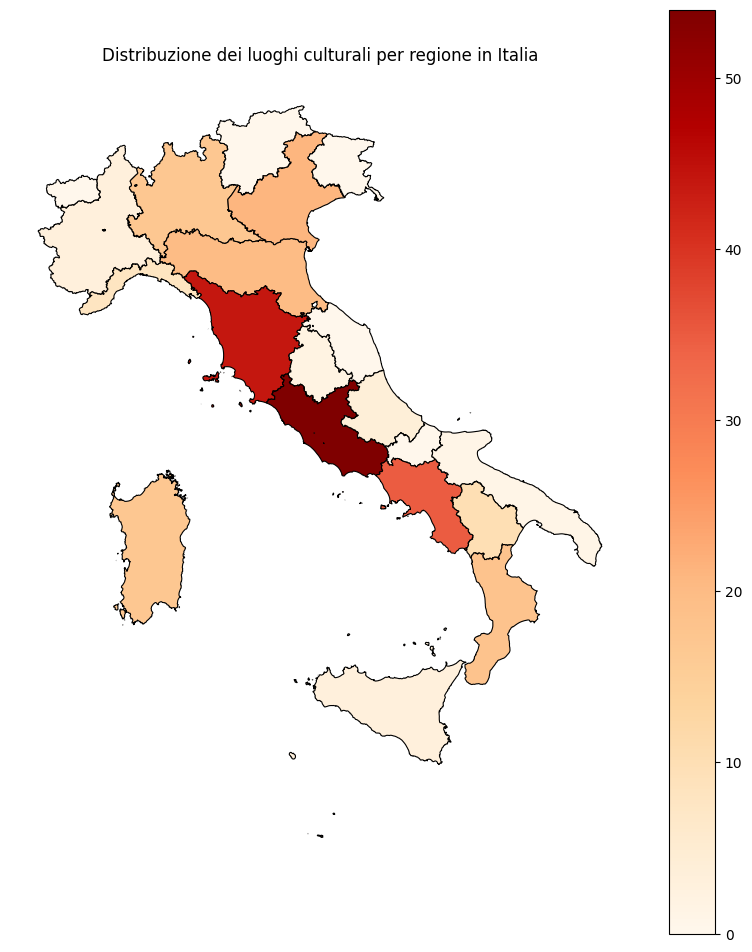

In [38]:
df_filtered = df[df['regione'] != 'Sconosciuto']
region_counts = df_filtered['regione'].value_counts().reset_index()
region_counts.columns = ['regione', 'count']
italy_regions = gpd.read_file("https://raw.githubusercontent.com/openpolis/geojson-italy/master/geojson/limits_IT_regions.geojson")
italy_regions = italy_regions.merge(region_counts, left_on="reg_name", right_on="regione", how="left").fillna(0)
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
italy_regions.plot(column="count", cmap="OrRd", linewidth=0.8, edgecolor="black", legend=True, ax=ax)
plt.title("Distribuzione dei luoghi culturali per regione in Italia")
plt.axis("off")
plt.show()

### 🌍 Mappa tematica-coropletica: Distribuzione geografica dei luoghi culturali

Il grafico che stai visualizzando è una mappa tematica o mappa coropletica. In una mappa coropletica, le aree geografiche (in questo caso, le regioni italiane) sono colorate in base a una variabile quantitativa (in questo caso, il numero di luoghi culturali per regione). Il colore delle regioni varia a seconda del valore della variabile, permettendo di evidenziare le aree con valori più alti o più bassi.Le regioni con una maggiore concentrazione di luoghi culturali sono evidenziate con tonalità più scure, mentre quelle con una minore concentrazione sono colorate con toni più chiari. La mappa evidenzia chiaramente le disparità nella distribuzione dei luoghi culturali tra le diverse regioni italiane. Alcune regioni mostrano una forte concentrazione, mentre altre appaiono significativamente meno rappresentate. Questo potrebbe essere il riflesso di diversi fattori, tra cui la densità di popolazione, la storia culturale e le politiche di sviluppo regionale. Questa visualizzazione fornisce una panoramica utile per le politiche culturali, suggerendo che un'analisi geografica può aiutare a identificare aree in cui concentrare gli sforzi per potenziare l'offerta culturale e garantire che tutte le regioni abbiano un'adeguata rappresentanza di strutture culturali.

ANALISI 5: DISTRIBUZIONE PERCENTUALE DEI LUOGHI CULTURALI PER REGIONE

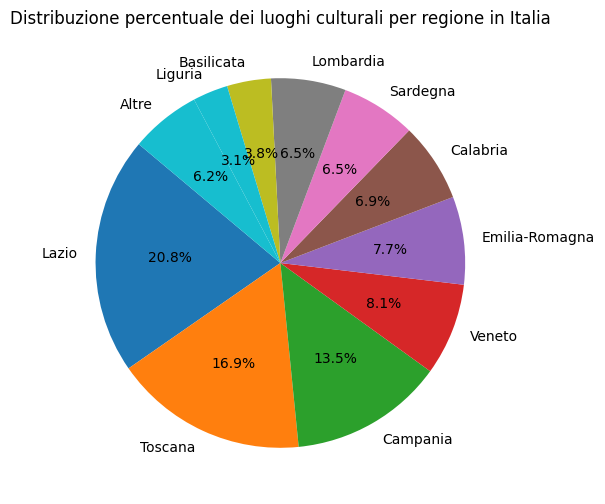

In [40]:
df_filtered = df[df['regione'] != 'Sconosciuto']
region_counts = df_filtered['regione'].value_counts()
top_regions = region_counts[:10]
others_count = region_counts[10:].sum()
top_regions["Altre"] = others_count
plt.figure(figsize=(10, 6))
top_regions.plot(kind='pie', autopct='%1.1f%%', cmap='tab10', startangle=140)
plt.title("Distribuzione percentuale dei luoghi culturali per regione in Italia")
plt.ylabel("")  
plt.show()

### 🍰 Grafico a torta: Distribuzione percentuale dei luoghi culturali per regione

Il grafico mostra la distribuzione percentuale dei luoghi culturali censiti per regione.
Si osserva che alcune regioni, come Lazio, Toscana e Campania, ospitano una quota significativa del patrimonio culturale italiano.
Questo è prevedibile, considerando la presenza di città storiche come Roma, Firenze e Napoli, ricche di musei, siti archeologici e biblioteche.
Al contrario, le regioni meno rappresentate potrebbero riflettere una minore densità demografica o una minore documentazione dei luoghi culturali locali.